# Dimensionality Reduction

We will discuss dimensionality reduction techniques like feature selection, PCA

![ater](https://storage.googleapis.com/lds-media/images/Dimensionality-Reduction-algorithms.width-1200.jpg)

## PCA

PCA has been called one of the most valuable results from applied linear algebra. PCA is used abundantly in all forms of analysis - from neuroscience to computer graphics - because it is a simple, non-parametric method of extracting relevant information from confusing data sets.

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

PCA is generally used for 2 applications:

1) Visualization of high dimentional datasets

2) Reducing number of features, thereby speeding up ML algorithms.

We will be primarily focussing on the first application in this lab.

In [ ]:
from sklearn.datasets import load_breast_cancer

In this lab, we will be using the breast_caner dataset. The data has 569 samples with thirty features, and each sample has a label associated with it (benign or malignant).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
breast_data = load_breast_cancer().data
print("Features:", breast_data.shape)  ### 569 rows and 30 columns expected

breast_labels = np.reshape(load_breast_cancer().target, (569,1))
print("Target:", breast_labels.shape) ### 569 rows and 1 target column expected

Features: (569, 30)
Target: (569, 1)


In [ ]:
## Creating a Pandas dataframe for the dataset with the last column as the target variable

final_breast_data = np.concatenate([breast_data,breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# Dividing the values into the features and labels for convenience later on

X = breast_dataset.iloc[:,:30].values
y = breast_dataset.iloc[:,30].values

print(np.shape(X), np.shape(y))

(569, 30) (569,)


### Step By Step Computation Of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data

2. Computing the covariance matrix

3. Calculating the eigenvectors and eigenvalues

4. Computing the Principal Components

5. Reducing the dimensions of the data set


### 1. Standardization of the data

---
It is a common practice to normalize your data before feeding it to any machine learning algorithm.

To apply normalization, you will import StandardScaler module from the sklearn library and then apply scaling by doing fit_transform on the feature data. While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one. Mathematically the standardization is done using the formula:

$z = \frac{value-mean}{standard~deviation}$


In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(np.std(X_std))

1.0


### 2. Computing the covariance matrix

---

Recall that covariance is always measured between 2 dimensions. If we have a data set with more than 2 dimensions, there is more than one covariance measurement that can be calculated. For example, from a 3 dimensional data set (dimensions x,y,z) you could calculate cov(x,y), cov(y,z) and cov(x,z). In fact, for an n-dimensional data set, you can calculate N combinatorial 2 different covariances.

Here we have 30 different features, so we will have to compute 435 different covariances. (n*(n-1))/2  = 30*29/2 = 435 

In [ ]:
mean_vec = np.mean(X_std, axis=0) ## Computing feature wise means

# Covariance matrix = i/(N-1) * X^T * X
# where X is the normalized feature matrix and N is the number of data points (rows)

cov_mat = 1/ (X_std.shape[0]-1) * (X_std - mean_vec).T.dot(X_std - mean_vec)

print('Covariance matrix first 5 rows and columns:\n', cov_mat[0:5, 0:5])

Covariance matrix first 5 rows and columns:
 [[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


A perhaps simpler way to do this is by using the numpy's covariance module "np.cov". However note that it takes as input the feature matrix with features in different rows, so in our application, we would be taking a transpose of the feature matrix before applying np.cov().

In [ ]:
cov_mat_numpy = np.cov(X_std.T)

print('Covariance matrix first 5 rows and columns:\n', cov_mat_numpy[0:5, 0:5])

Covariance matrix first 5 rows and columns:
 [[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


### 3. Calculating the eigenvectors and eigenvalues

---

Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix. These are rather important, as they tell us useful information about our data. 

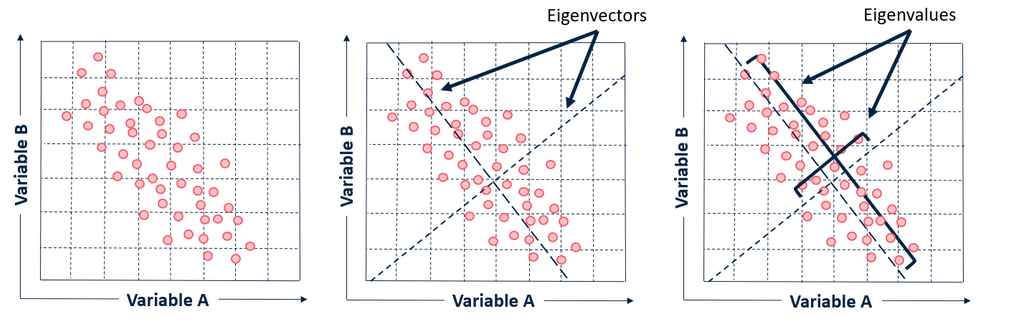

See how one of the eigenvectors goes through the middle of the points, like drawing a line of best fit? That eigenvector is showing us how these two data sets are related along that line. The second eigenvector gives us the other, less important, pattern in the data, that all the points follow the main line, but are off to the side of the main line by some amount.

So, by this process of taking the eigenvectors of the covariance matrix, we have
been able to extract lines that characterise the data.

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

### 4. Computing the Principal Components

---




In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = []
for i in range(len(eig_vals)):
  eig_pairs.append( (np.abs(eig_vals[i]), eig_vecs[:,i]) )


# Sort the (eigenvalue, eigenvector) tuples from high to low
# key= lambda x: x[0] => use the eigenvalues (first component of the tuple) to sort the tuples
# reverse = True => Descending order
eig_pairs.sort(key=lambda x: x[0], reverse=True)


# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Top 10 Eigenvalues in descending order:')
for i in eig_pairs[:10]:
    print(i[0])

Top 10 Eigenvalues in descending order:
13.304990794374568
5.701374603726145
2.8229101550062303
1.9841275177302011
1.6516332423301199
1.2094822398029705
0.6764088817009047
0.477456254689509
0.4176287821078165
0.35131087488173396


#### Plotting the variance explained and choosing the number of Principal components

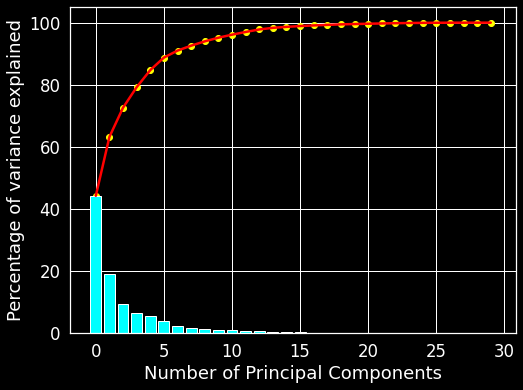

In [ ]:
total = np.sum(eig_vals)
eig_val = 100 * eig_vals/total
eig_val = sorted(eig_val, reverse=True)

with plt.style.context('dark_background'):
    plt.figure(figsize = (8, 6))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(30), eig_val[:30], color = "aqua")
    plt.plot(range(30), np.cumsum(eig_val[:30]), color = "red")
    plt.scatter(range(30), np.cumsum(eig_val[:30]), color = "yellow")

So, the first principal component alone explains more than 40% variance in the dataset. Also note that considering all the 30 dimensions explains 100% of the variance in the dataset as expected.

Choosing a suitable number of components for further visualizations is generally based on the cumulative sum of PCs. The first 2 PCs explain nearly 65% variance, and the first 3 explain close to 75% variance.

Lets now try and reduce the dimensions of our dataset to the first 2 and 3 principal components

### 5. Reducing the dimensions of the data set
---
and recasting the data along the principal component axes


In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1), 
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

Y = X_std.dot(matrix_w)

print(Y)

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


Now, that you have spent such a long time building this final matrix Y which has reduced each datapoint to 3 dimensions......

All of this can also be done in 2 lines by using sklearn's PCA module. 

In [ ]:
from sklearn.decomposition import PCA 

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(Y_sklearn)

[[ 9.19283683  1.94858319 -1.12317276]
 [ 2.3878018  -3.76817167 -0.52929684]
 [ 5.73389628 -1.07517378 -0.55174692]
 ...
 [ 1.25617928 -1.90229676  0.56273267]
 [10.37479406  1.67201009 -1.87702829]
 [-5.4752433  -0.67063653  1.49043117]]


## Let's visualize our dataset in 2 and 3 dimensions now

---



In [ ]:
final_df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])

for i in range(len(Y)):
    
    dicti = dict()
    
    dicti["PC1"] = Y[i, 0]
    dicti["PC2"] = Y[i, 1]
    dicti["PC3"] = Y[i, 2]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"
    
    final_df = final_df.append(dicti, ignore_index = True)

final_df.head()

,PC1,PC2,PC3,Label
0,9.192837,1.948583,-1.123166,Benign
1,2.387802,-3.768172,-0.529293,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232790,Benign
4,3.935302,-1.948072,1.389767,Benign


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})

fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=8,))

fig.show(renderer = "colab")

### Question: 
Referring to the plot above, can you reason why PCA can be a good candidate before training models for Machine learning?




Let us now try and visualize this in the first 3 Principal Components space.

In [ ]:
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

Feel free to explore this interactive plot by PLOTLY, which is also another great tool for visualizations. You can zoom, pan, rotate, turn and download this plot.

### Some interesting references:

1. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

2. http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

3. https://www.cs.cmu.edu/~elaw/papers/pca.pdf

4. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

## KPCA

We will be now focussing on non-linear dimensionality reduction methods. The PCA approach discussed before is a linear projection technique that works well if the data is linearly separable. However, in the case of linearly inseparable data, a nonlinear technique is required if the task is to reduce the dimensionality of a dataset.

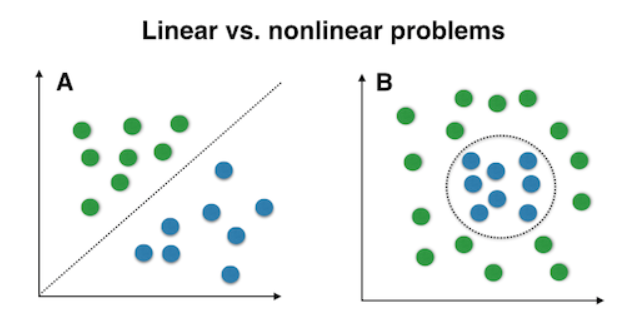

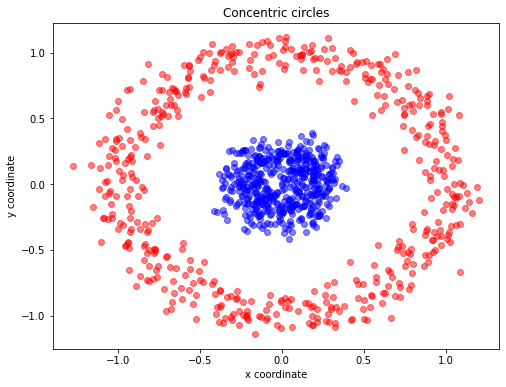

In [2]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

### Applying linear PCA

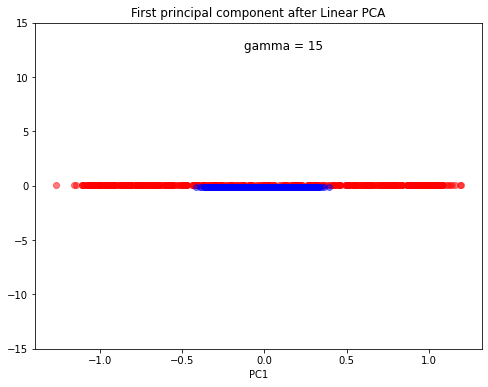

In [5]:
from sklearn.decomposition import PCA
import numpy as np
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], np.zeros((500,1))+0.1, color='red', alpha=0.5)
plt.scatter(X[y==1, 0], np.zeros((500,1))-0.1, color='blue', alpha=0.5)
plt.ylim([-15,15])
plt.text(-0.125, 12.5, 'gamma = 15', fontsize=12)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

### Gaussian RBF kernel PCA

In [10]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

C:\Users\monal\AppData\Local\Temp\ipykernel_29332\2654632692.py:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
C:\Users\monal\AppData\Local\Temp\ipykernel_29332\2654632692.py:37: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))


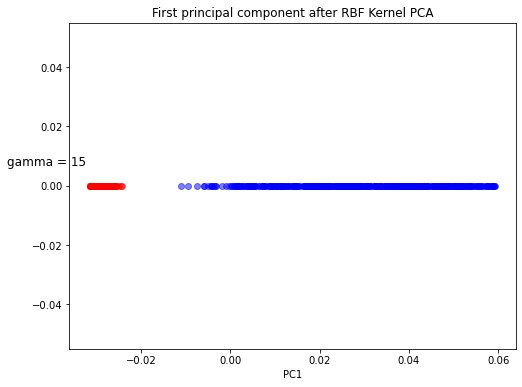

In [11]:
X_pc = stepwise_kpca(X, gamma=15, n_components=1)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.text(-0.05, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

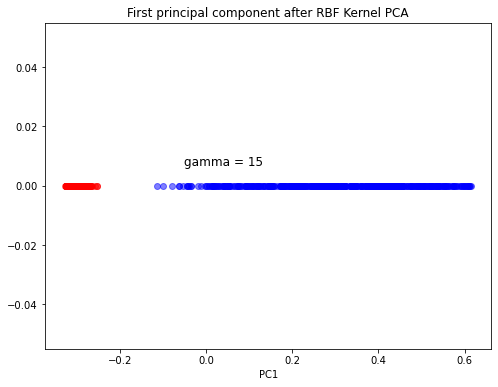

In [12]:
kpca1 = KernelPCA(n_components=1, kernel='rbf', gamma=15)
Xkpca1 = kpca1.fit_transform(X)
 
plt.figure(figsize=(8,6))
plt.scatter(Xkpca1[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(Xkpca1[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.text(-0.05, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

https://sebastianraschka.com/Articles/2014_kernel_pca.html

https://nirpyresearch.com/pca-kernel-pca-explained/

## Multidimensional Scaling

In this example, we first define a dissimilarity matrix as a NumPy array. The dissimilarity matrix specifies the dissimilarities between pairs of objects in the dataset. In this example, we have a 4x4 dissimilarity matrix that specifies the dissimilarities between 4 objects.

Next, we instantiate an MDS object from the scikit-learn library, specifying that we want to reduce the dimensionality of the dataset to 2 dimensions, and that the dissimilarities are specified in a precomputed matrix.

Finally, we apply the MDS algorithm to the dissimilarity matrix using the `fit_transform` method of the MDS object. This returns a 2D array of coordinates that represents the positions of the objects in the reduced-dimensional space.

Note that the resulting coordinates may be scaled and/or rotated with respect to each other, so you may want to perform additional transformations (e.g., scaling, rotation) on the coordinates to align them with your preferred reference frame.

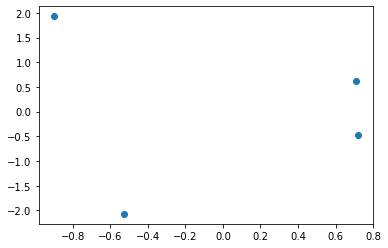

In [13]:
import numpy as np
from sklearn.manifold import MDS

# Generate example dissimilarity matrix
D = np.array([[0.0, 2.0, 3.0, 4.0],
              [2.0, 0.0, 1.0, 3.0],
              [3.0, 1.0, 0.0, 2.0],
              [4.0, 3.0, 2.0, 0.0]])

# Perform MDS with 2-dimensional output space
mds = MDS(n_components=2, dissimilarity='precomputed')
X = mds.fit_transform(D)

# Plot results
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.show()


In [14]:
print(D.shape)
print()
print(X.shape)

(4, 4)

(4, 2)


### DataFrame that contains information about the sales made in different months

In [18]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'months': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],
                   'sales': [4, 4, 6, 7, 8, 14, 16, 19, 25, 25, 28, 11],
                   'profit': [3, 2, 2, 5, 4, 8, 7, 6, 8, 10, 11,5],
                   'ordered': [7, 3, 6, 7, 5, 8, 8, 4, 2, 2, 1,6],
                   'rebounds': [4, 5, 5, 6, 5, 8, 10, 4, 3, 2, 2,9]})

#set player column as index column
df = df.set_index('months')

#view Dataframe
print(df)

        sales  profit  ordered  rebounds
months                                  
Jan         4       3        7         4
Feb         4       2        3         5
Mar         6       2        6         5
Apr         7       5        7         6
May         8       4        5         5
June       14       8        8         8
July       16       7        8        10
Aug        19       6        4         4
Sep        25       8        2         3
Oct        25      10        2         2
Nov        28      11        1         2
Dec        11       5        6         9


In [19]:
from sklearn.manifold import MDS

#perform multi-dimensional scaling
mds = MDS(random_state=0)
scaled_df = mds.fit_transform(df)

#view results of multi-dimensional scaling
print(scaled_df)

[[  1.01493523  10.74186492]
 [  4.75853695   9.72586194]
 [  1.96850378   8.64650428]
 [ -0.67600376   7.29770398]
 [  1.68481444   5.96660848]
 [ -4.44302077   0.26795477]
 [ -6.14163437  -1.0801686 ]
 [  0.88824053  -5.11433339]
 [ -0.05829479 -11.8789196 ]
 [  1.68503308 -12.51282057]
 [  2.06996391 -15.70407796]
 [ -2.75107425   3.64382175]]


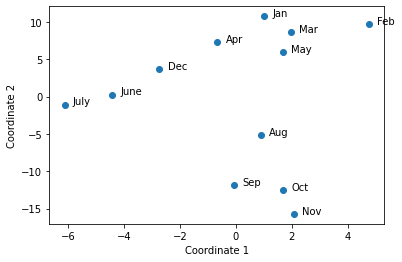

In [20]:
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(scaled_df[:,0], scaled_df[:,1])

#add axis labels
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')

#add lables to each point
for i, txt in enumerate(df.index):
    plt.annotate(txt, (scaled_df[:,0][i]+.3, scaled_df[:,1][i]))

#display scatterplot
plt.show()

Months from the original DataFrame who have similar values across the original four columns (sales, profit, ordered, and rebounds) are located close to each other in the plot.

For example, Oct and Nov are located close to each other. Here are their values from the original DataFrame:

In [21]:
df.loc[['Oct','Nov']]

,sales,profit,ordered,rebounds
months,,,,
Oct,25,10,2,2
Nov,28,11,1,2


The values for all the features are all quite similar, that is why these points are located so close together in the 2-D plot.

By contrast, consider the points that are located far apart in the plot (Feb and July).

If we refer to their values in the original DataFrame, we can see that they’re quite different:

In [22]:
df.loc[['Feb','July']]

,sales,profit,ordered,rebounds
months,,,,
Feb,4,2,3,5
July,16,7,8,10
